In [2]:
# Should Make School Bring 'VR' Back As One of the Tracks? (NPS Project by Zain Raza)

In [114]:
# let's get to the code!
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df = pd.read_csv('SA Feedback Surveys_FINAL/2017/Student-Feedback-Surveys-Superview.csv')
df.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


In [116]:
# Q1: In this survey, how many of the responses came from VR students? 
vr_students = df[df['Track'] == 'VR']
num_vr = len(vr_students)
num_vr

60

In [6]:
# But wait! This does not mean there were 60 different VR students in the program!
# Q2: Assuming that students were not allowed to change concentration, 
# and that students were not allowed to enter Make School mid-program, what is the number of distinct students in VR?

# let's create a distribution of students by week and by track, so we can get an idea of how many students there were
# in each track
table = pd.crosstab(df['Track'], df['Week'])
table

Week,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
Track,,,,,,,,
Apps,183,176,142,105,101,88,72,4
"Apps, Explorer",42,40,38,34,31,23,16,0
Games,35,29,36,33,31,21,19,4
"Games, Explorer",6,6,7,7,6,6,5,0
VR,10,10,10,10,7,5,7,1


In [103]:
# Let's assume the max in row represents the number of students in that track

# find the numbers of students
students_apps = dict(pd.crosstab(df['Week'], df['Track']))['Apps'].values.max()  # students in Apps track
students_apps_explorer = dict(pd.crosstab(df['Week'], df['Track']))['Apps, Explorer'].values.max()  # students in Apps/Explorer track
students_games = dict(pd.crosstab(df['Week'], df['Track']))['Games'].values.max()  # students in Games track
students_games_explorer = dict(pd.crosstab(df['Week'], df['Track']))['Games, Explorer'].values.max()  # students in Games/Explorer track
students_vr = dict(pd.crosstab(df['Week'], df['Track']))['VR'].values.max()  # students in VR track

# store them in a list
num_students = [
    students_apps,
    students_apps_explorer,
    students_games,
    students_games_explorer,
    students_vr
]

track_names = ['Apps', 'Apps, Explorer','Games','Games, Explorer','VR']

# Q3: What percentage of students did each track take up out of all students?
# calculate the percentages of students in each track, out of all the students in the program
total = sum(num_students)
percentages = [num/total for num in num_students]

students_for_each_track = pd.DataFrame(data={
        '# Students': num_students,
        '% of All Students': percentages
    }, index=track_names,
)
# we can now see (an estimate of) the number of students in each track, and the percentage they made of all students!
students_for_each_track

,# Students,% of All Students
Apps,183,0.658273
"Apps, Explorer",42,0.151079
Games,36,0.129496
"Games, Explorer",7,0.025180
VR,10,0.035971


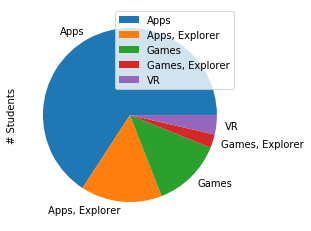

In [47]:
# To compare, let's create a pie chart!
students_for_each_track.plot.pie(y='# Students')

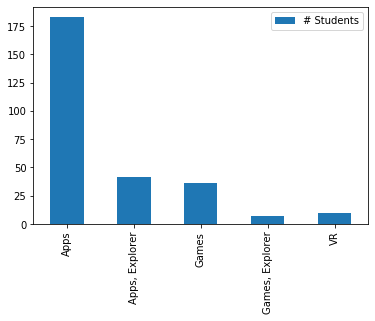

In [50]:
# Let's See the Data Again, Using a Bar Chart!
students_for_each_track.plot.bar(y='# Students')

In [99]:
# Q4: As a group, what was the NPS score of students in the VR track?
def calculate_nps(track, week):
    '''Return the NPS score of students within a given track at Make School, for a given week during the program.'''
    students = df[(df['Track'] == track) & (df['Week'] == week)]
    # classify people as either promoters, passives, or detractors
    promoters, passives, detractors = 0, 0, 0
    ratings = students['Rating (Num)']
    for rating in ratings:
        rating = int(rating)
        if rating >= 9:
            promoters +=1
        elif rating >= 7:
            passives += 1
        else:
            detractors += 1
    # calculate the NPS score!
    nps = (promoters - detractors)/(promoters + passives + detractors)
    return nps

In [102]:
# How does the function above work? Let's test it out, using VR students during Week 1 as our data sample!
calculate_nps('VR', 'Week 1')

0.7

In [113]:
# Cool! So how did the NPS score of VR students change over the course of Make School?
# How does their trend compare with students from other tracks?

weeks = [
    'Week 1',
    'Week 2',
    'Week 3',
    'Week 4',
    'Week 5',
    'Week 6',
    'Week 7',
    'Week 8',
]

nps_by_track_per_week = pd.DataFrame(data={
        weeks[0]: [], # list of NPS scores for week 1 only, in this order by track: 'Apps', 'Apps, Explorer','Games','Games, Explorer','VR'
        weeks[1]: [],
        weeks[2]: [],
        weeks[3]: [],
        weeks[4]: [],
        weeks[5]: [],
        weeks[7]: [],
    }, index=track_names
)

In [ ]:
# Q5: On average, how well did VR students handle the pacing of Make School?
# How did this sentiment change over the course of the 2017 program? (line graph)

In [ ]:
# Q6: Where did the students in the VR track come from? (bar and pie graph)

In [ ]:
# Q7: What was the amount of variance in the NPS score of students in the VR track? 
# How does their NPS score variance compare with that of the other tracks?

In [ ]:
# Q8: What was the amount of variance in how many VR students responded to the NPS survey over the 8 weeks?
# How does this compare to students from the other tracks?